In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Visual Settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load Cleaned Data
df = pd.read_csv("../data/improve/crop1_clean.csv")  # Updated path
pivot_df = pd.read_csv("../data/improve/crop_data_pivot.csv")

# Preview
print(df.head())

          Area                 Item         Element  Year Unit   Value  \
0  Afghanistan  Almonds, with shell  Area harvested  1975   ha     0.0   
1  Afghanistan  Almonds, with shell  Area harvested  1976   ha  5900.0   
2  Afghanistan  Almonds, with shell  Area harvested  1977   ha  6000.0   
3  Afghanistan  Almonds, with shell  Area harvested  1978   ha  6000.0   
4  Afghanistan  Almonds, with shell  Area harvested  1979   ha  6000.0   

          Element_Unit  Value_winsor  Value_log  Decade  
0  Area harvested (ha)           6.0   1.945910    1970  
1  Area harvested (ha)        5900.0   8.682877    1970  
2  Area harvested (ha)        6000.0   8.699681    1970  
3  Area harvested (ha)        6000.0   8.699681    1970  
4  Area harvested (ha)        6000.0   8.699681    1970  


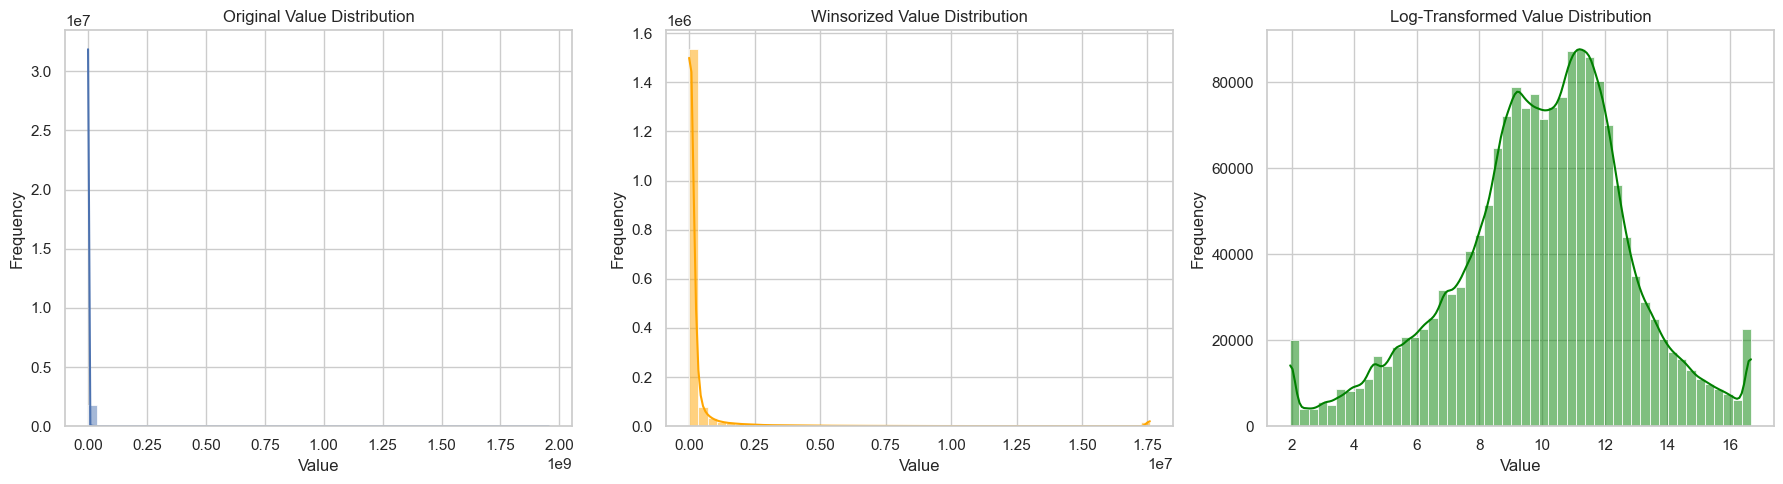

In [2]:
# Value Distribution (Original vs Winsorized vs Log)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["Value"], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Original Value Distribution")

sns.histplot(df["Value_winsor"], bins=50, ax=axes[1], kde=True, color="orange")
axes[1].set_title("Winsorized Value Distribution")

sns.histplot(df["Value_log"], bins=50, ax=axes[2], kde=True, color="green")
axes[2].set_title("Log-Transformed Value Distribution")

for ax in axes:
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

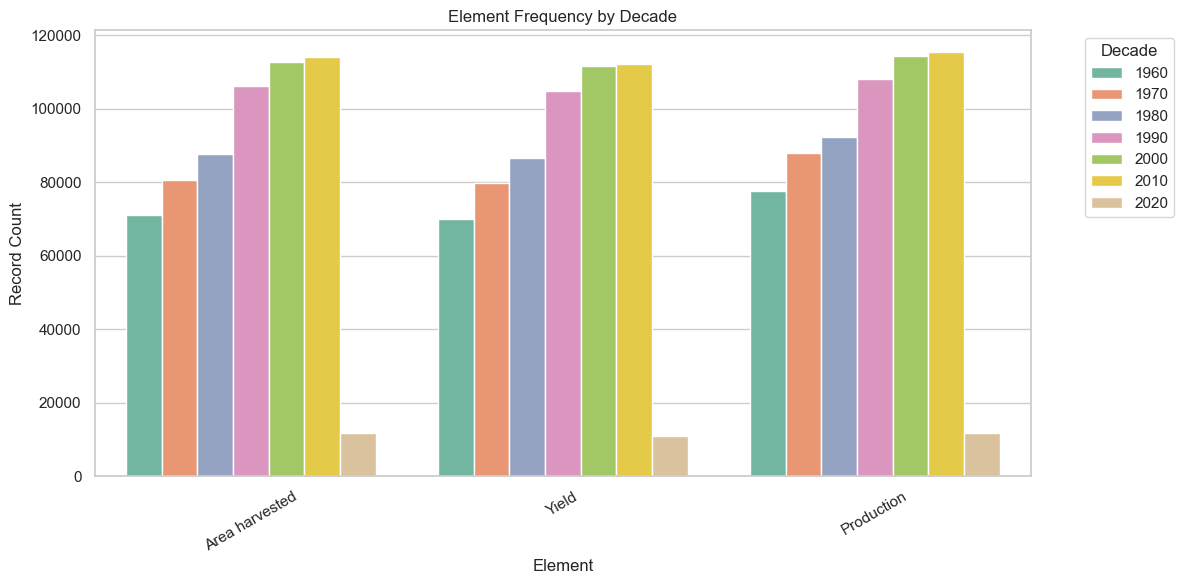

In [3]:
# Element Count by Decade
sns.countplot(data=df, x="Element", hue="Decade", palette="Set2")
plt.title("Element Frequency by Decade")
plt.xlabel("Element")
plt.ylabel("Record Count")
plt.xticks(rotation=30)
plt.legend(title="Decade", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15336\1203268878.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")


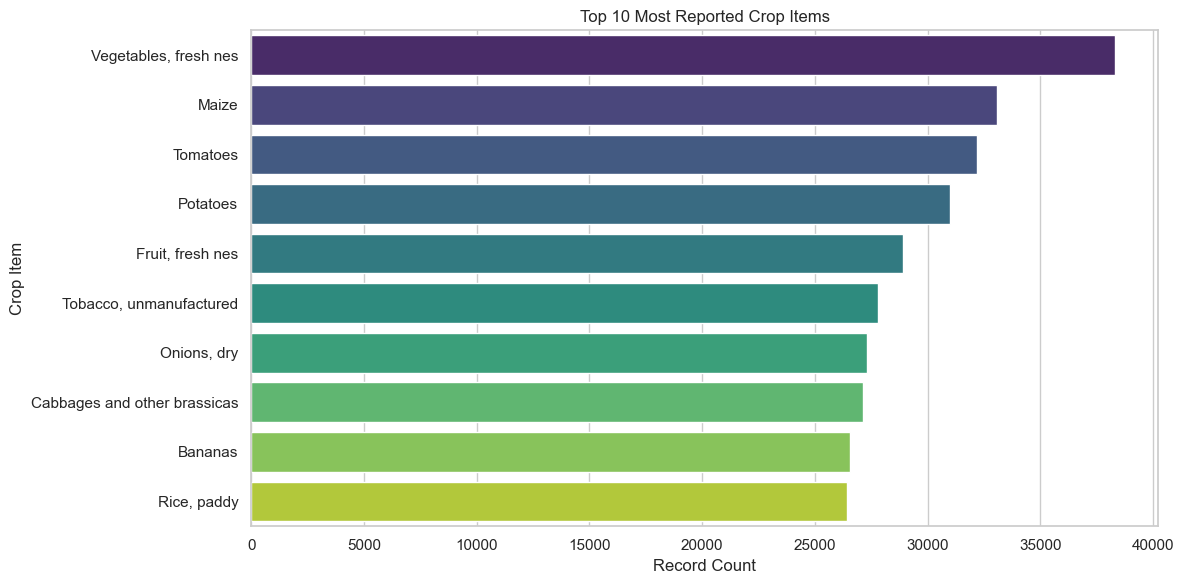

In [4]:
# Top 10 items by occurrence
top_items = df["Item"].value_counts().head(10)

sns.barplot(y=top_items.index, x=top_items.values, palette="viridis")
plt.title("Top 10 Most Reported Crop Items")
plt.xlabel("Record Count")
plt.ylabel("Crop Item")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15336\684107726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Element", y="Value_log", palette="pastel")


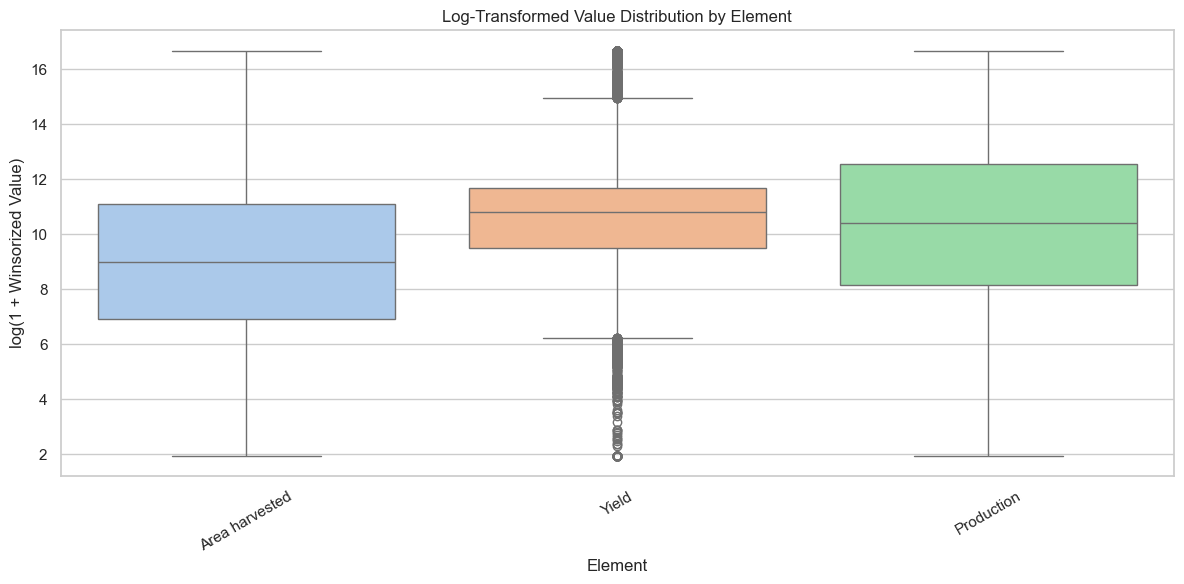

In [5]:
# Boxplot of Log-Transformed Values by Element

sns.boxplot(data=df, x="Element", y="Value_log", palette="pastel")
plt.title("Log-Transformed Value Distribution by Element")
plt.xlabel("Element")
plt.ylabel("log(1 + Winsorized Value)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

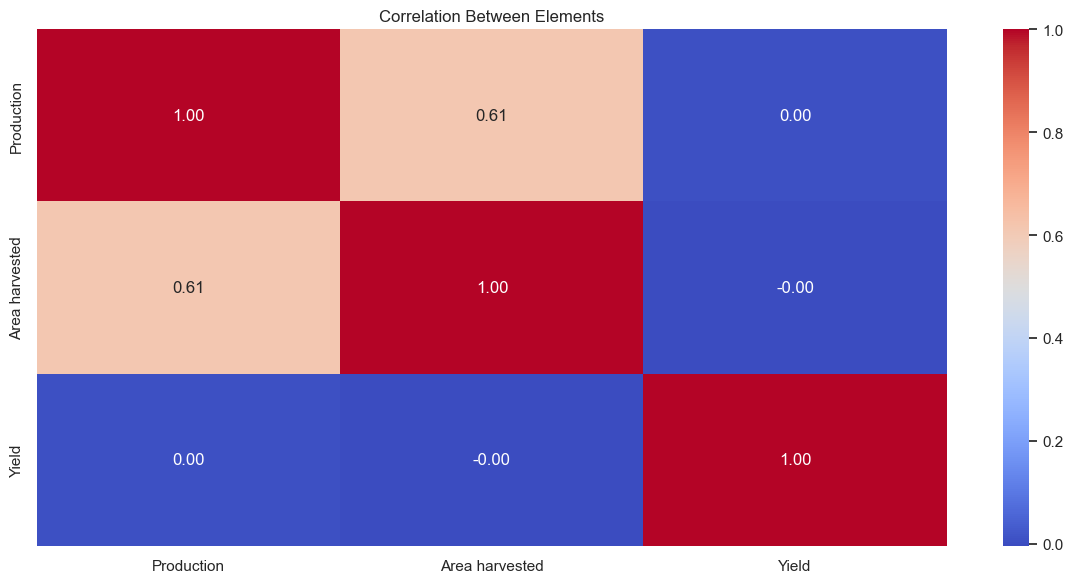

In [6]:
# Correlation Heatmap of Key Elements
corr = pivot_df[["Production", "Area harvested", "Yield"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Elements")
plt.tight_layout()
plt.show()

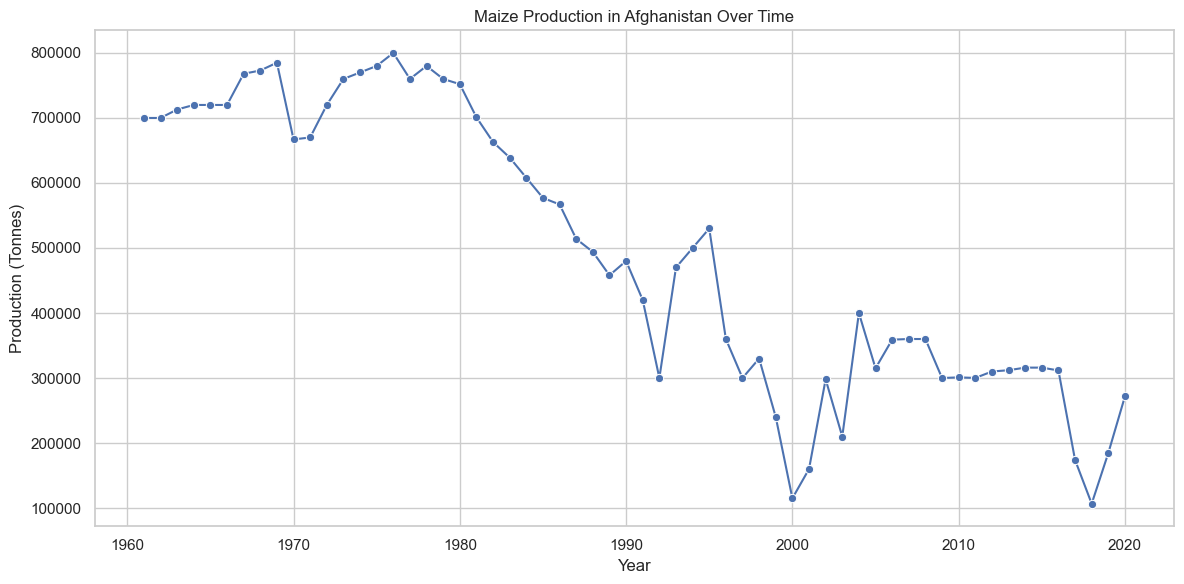

In [7]:
# Time Series: Maize Production in Afghanistan
mask = (df["Area"] == "Afghanistan") & (df["Item"] == "Maize") & (df["Element"] == "Production")
df_plot = df[mask].sort_values("Year")

# Static plot
sns.lineplot(data=df_plot, x="Year", y="Value", marker="o")
plt.title("Maize Production in Afghanistan Over Time")
plt.ylabel("Production (Tonnes)")
plt.tight_layout()
plt.show()

# Interactive plot
fig = px.line(
    df_plot,
    x="Year",
    y="Value",
    title="Maize Production in Afghanistan (Interactive)",
    labels={"Value": "Tonnes"},
    template="plotly_dark"
)
fig.show()


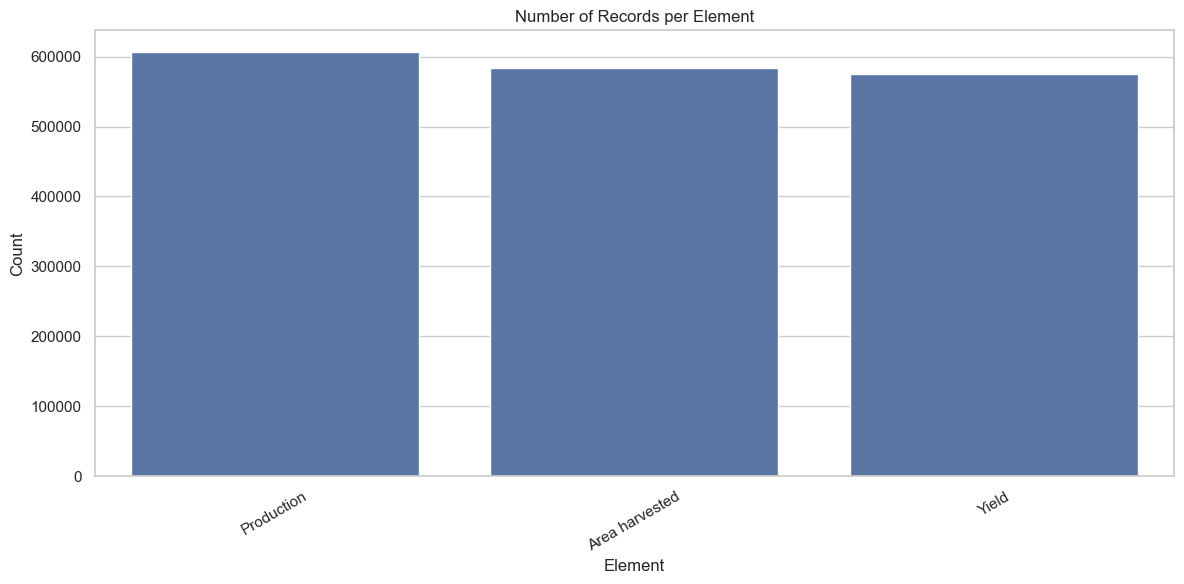

In [8]:
# Record count per element

element_counts = df["Element"].value_counts()

sns.barplot(x=element_counts.index, y=element_counts.values)
plt.title("Number of Records per Element")
plt.ylabel("Count")
plt.xlabel("Element")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()